In [819]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.ensemble import VotingClassifier

In [820]:
# loading the dataset
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [821]:
# descibre to initial analisys
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [822]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [823]:
# getting the count values
def value_count():
    print(df['gender'].value_counts())
    print('----------------')
    print(df['ever_married'].value_counts())
    print('----------------')
    print(df['work_type'].value_counts())
    print('----------------')
    print(df['Residence_type'].value_counts())

value_count()



Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
----------------
Yes    3353
No     1757
Name: ever_married, dtype: int64
----------------
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
----------------
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

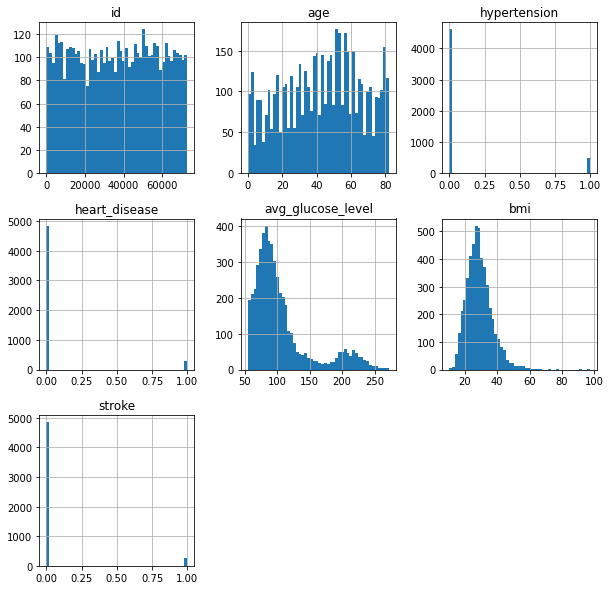

In [824]:
%matplotlib inline
# some histograms for a initial analisys
df.hist(bins=50, figsize=(10,10))


In [825]:
# df['glic_strat'] = np.ceil(df['avg_glucose_level'] / 5.5)
# df['glic_strat'].where(df['glic_strat']  < 20,20.0, inplace=True)
# df['glic_strat'].hist()

In [826]:
# # Stratified the data to get train and dataset balanced
# from sklearn.model_selection import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
# for train_index, test_index in split.split(df,df['glic_strat']):
#     train_set = df.loc[train_index]
#     test_set = df.loc[test_index]

In [827]:
# test_set['glic_strat'].value_counts() /len(test_set)

In [828]:
# # Getting the dataset to the original state
# for _set in (train_set,test_set):
#     _set.drop('glic_strat',axis=1,inplace=True)
# train_set.head(5)

In [829]:
# df = train_set.copy()
# df

In [830]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


# Data Analisys

In [831]:

miss_values = (df.isnull().sum())
print(f'{miss_values} fault values')

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64 fault values


In [832]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [833]:
df_eda = df.copy()
df_eda['hypertension'] = df['hypertension'].map({1: 'Yes', 0:'No'})
df_eda['stroke'] = df['stroke'].map({1: 'Yes', 0:'No'})
df_eda['heart_disease'] = df['heart_disease'].map({1: 'Yes', 0:'No'})

In [834]:
# function to use distribuition graph
def distplot(data_column):
    graph = sns.distplot(data_column,hist=True,kde=True,hist_kws={'linewidth':3})

def pie_graph(data,title,values):
    labels = data[values].value_counts().index
    values = data[values].value_counts()
    fig = go.Figure(data=(go.Pie(labels=labels,values=values)))
    fig.update_layout(title_text = title)
    fig.show()

/home/pedro/Desktop/ML/.env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



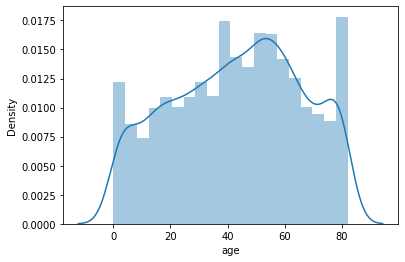

In [835]:
graph = distplot(df_eda['age'])


Ages are concentrated in the range of 30 to 60 years


In [836]:
def split_age(age):
    if age < 10:
        return '0-9'
    if  20 >  age >= 10:
        return '10-20'
    if  30>  age >= 20:
        return '20-30'
    if  40 >  age >= 30:
        return '30-40'
    if  50 >  age >= 40:
        return '40-50'
    if  60 >  age >= 50:
        return '50-60'
    if age > 60:
        return '60+'

In [837]:
df_cat = pd.DataFrame()
df_cat['age_cat'] = df['age'].apply(split_age)
pie_graph(df_cat,'Age Distribuition Pie Graph','age_cat')


<AxesSubplot:xlabel='gender', ylabel='count'>

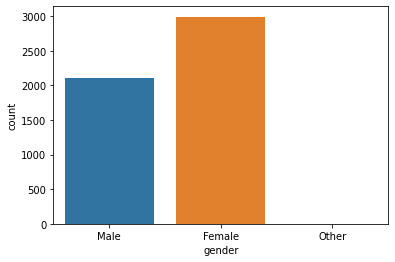

In [838]:
sns.countplot(data=df_eda,x='gender')
# the dataset have a desbalanced in gender 

<AxesSubplot:xlabel='hypertension', ylabel='count'>

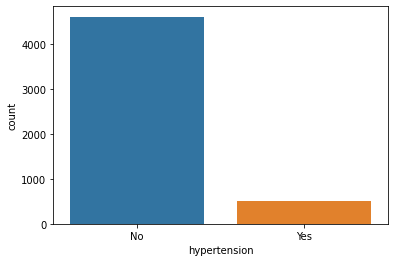

In [839]:
sns.countplot(data=df_eda,x='hypertension')

In [840]:
def encoder_gender(gender):
    if gender == 'Female':
        return 0
    if gender == 'Male':
        return 1


df_cat['gender'] = df['gender'].apply(encoder_gender)
df['stroke'].corr(df_cat['gender']) 

0.009080600160079349

/home/pedro/Desktop/ML/.env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



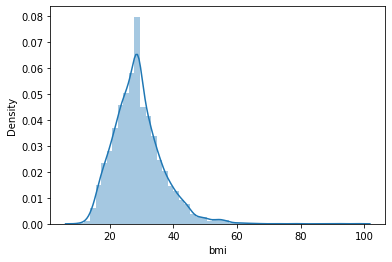

In [841]:
distplot(df_eda['bmi'])

In [842]:
pie_graph(df_eda,'Ever married Distribuition', 'ever_married')

In [843]:
pie_graph(df_eda,'Work Type Distribuition', 'work_type')

/home/pedro/Desktop/ML/.env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



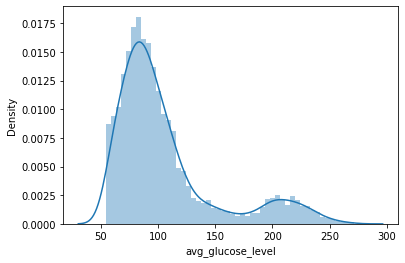

In [844]:
distplot(df_eda['avg_glucose_level'])

In [845]:
pie_graph(df_eda,'Distribuition Residence','Residence_type' )

In [846]:
pie_graph(df_eda,'Smoking Status Distribuition','smoking_status')

# Description of dataset

**Age**:
 
472 people are between 0-9 years old, which represents 9.37% of the data

494 people are between 10-20 years old which represents 9.81% of the data

549 people are between 20-30 years old, which represents 10.9% of the data

655 people are between 30-40 years old, which represents 13% of the data

730 people are between 40-50 years old which represents 14.5% of the data

834 people are between 50-60 years old, which represents 16.6% of the data

1304 people are between 60 years old which represents 25.9% of the data

**Gender**:

The ditribution of men and women is unequal in the dataset

**Hypertension**:

Few people have hypertension.

**BMI**:

The BMI distribution has an average of 28.89, with a minimum of 10.3 and a maximum of 97.6

**Work Type**:

2925 people have employment in the private sector, totaling 57.2% of the data

819 people are self-employed, totaling 16% of the data

687 people are children totaling 13.4% of the data

657 people work for the government totaling 12.8% of the data

22 people never worked, totaling 0.367% of the data

**Average Glucose Level**:

The AVG_Glucose_Level distribution has its mean at 106.147677 with the minimum value at 55.12 and the maximum at 271.74

**Residence_type**:

2596 people live in urban space totaling 50.8% of the data

2514 people live in rural areas totaling 49.2% of the data

**Smoking Status**

1892 people never smoked totaling 37.2% of the data

1544 people have the status unknown totaling 30.2% of the data

885 people smoke sporadically, totaling 17.5% of the data

789 people smoke, totaling 15.2%

**Ever Married**

3353 people were married at least once in their lifetime, totaling 65.6% of the data

1757 people never married totaling 34.2% of the data







# Categorical Analisys

In [847]:
def countplot_bar(df,x,hue,title):
    fig = sns.countplot(data=df,x = x,hue= hue)
    fig.set_title(title)


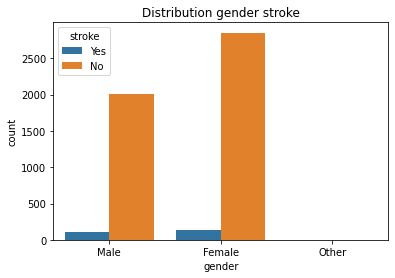

In [848]:
countplot_bar(df_eda,'gender','stroke','Distribution gender stroke')

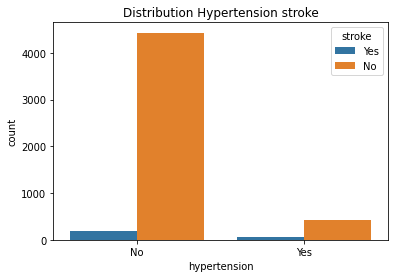

In [849]:
countplot_bar(df_eda,'hypertension','stroke','Distribution Hypertension stroke')

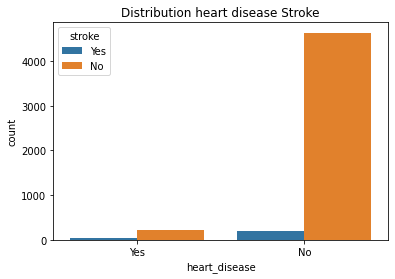

In [850]:
countplot_bar(df_eda,'heart_disease','stroke','Distribution heart disease Stroke')

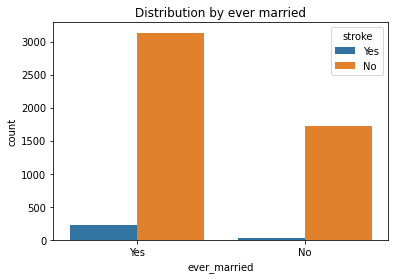

In [851]:
countplot_bar(df_eda,'ever_married','stroke','Distribution by ever married')

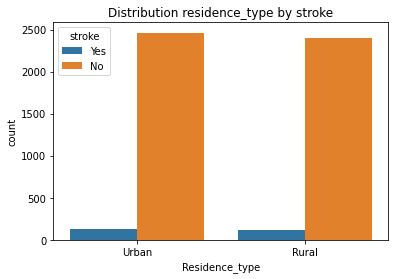

In [852]:
countplot_bar(df_eda,'Residence_type','stroke','Distribution residence_type by stroke')

In [853]:
def horizontal_bar_plot(df,x,y,color,title):
    fig = px.bar(df,x=x,y=y,color=color,height=600,title=title)
    fig.show()

In [854]:
df_group = df_eda.groupby(['stroke','smoking_status'],as_index=False).size().sort_values(by='size')

graph = horizontal_bar_plot(df =df_group,x ='stroke',y='size',color='smoking_status',title='Distribution smoking stroke')


In [855]:
df_group = df_eda.groupby(['stroke','work_type'],as_index=False).size().sort_values(by='size')
horizontal_bar_plot(df=df_group,x = 'stroke',y='size',color='work_type',title='Distribuition work type for stroke')

In [856]:
def reg_plot(x,y,hue,df):
    sns.lmplot(x=x,y=y,hue=hue,data=df, markers=['o','x'],palette='Set1')

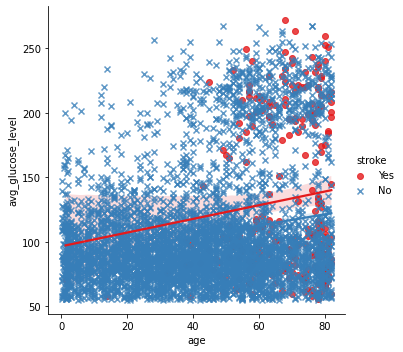

In [857]:
reg_plot('age','avg_glucose_level','stroke',df_eda)

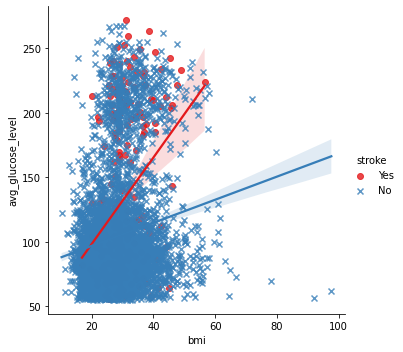

In [858]:
reg_plot('bmi','avg_glucose_level','stroke',df_eda)

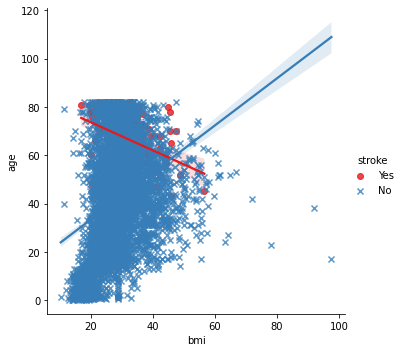

In [859]:
reg_plot('bmi','age','stroke',df_eda)

# Analisys of categorical features

Mulheres tem um leve número de casos de AVC maior que o de homens.

Pessoas com hipertensão tem percentualmente um número maior de AVC do que quem não tem

Pessoas com doença no coração tem percentualmente um númerio maior de AVCS do que quem não tem

Pessoas casadas tem mais chance de ter um AVC

Regiões urbanas tem um numero de casos de AVC maiores que regiões rurais

Ser fumante casual ou fumante aumenta a chance de ter um AVC

Pessoas que trabalham no setor privado tem mais chances de ter um AVC do que quem trabalha no setor governamental ou autônomo

A maior correlação de AVC é com a idade, quanto mais velho mais suscetível a ter um AVC

Pessoas com BMI alto tem menos avg_glucose level



# Correlations

<AxesSubplot:>

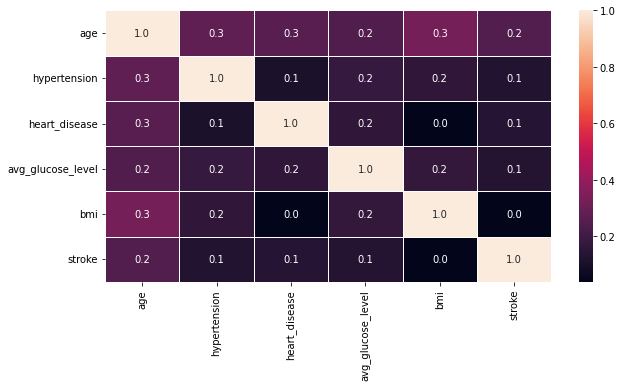

In [860]:
f, ax = plt.subplots(figsize=(10,5))

df.drop('id',axis=1,inplace=True)
sns.heatmap(df.corr(), annot=True,linewidths=.5,fmt='.1f', ax=ax)



In [861]:
df.corr()['stroke'].sort_values(ascending =False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.038947
Name: stroke, dtype: float64

# Encoder 

In [862]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [863]:

cols_string = ['gender','ever_married','Residence_type']

labelEncoder = sklearn.preprocessing.LabelEncoder()

for col in cols_string:
    df[col] = labelEncoder.fit_transform(df[col])


In [864]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1


In [865]:
df = pd.get_dummies(df)
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0


In [866]:
X = df.drop(columns=['stroke'])
y = df['stroke']

In [867]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X,y)


In [868]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_sm,y_sm, test_size = 0.2, random_state = 42)
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((7777, 17), (7777,), (1945, 17), (1945,))

In [869]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training Models

## Naivy Bayes

Naivy Bayes Classifier Testing-set Accuracy is 0.6534704370179949


<AxesSubplot:>

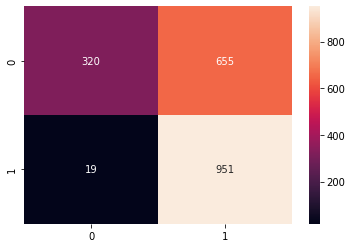

In [870]:

naive = GaussianNB()
naive.fit(X_train,y_train)
y_pred = naive.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f'Naivy Bayes Classifier Testing-set Accuracy is {acc}')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot = True, fmt='d')

## Decision Tree

Decision Tree classifier Testing-set accuracy is 0.9434447300771208


<AxesSubplot:>

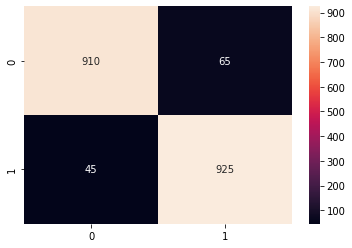

In [871]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
acc_dec_tree = accuracy_score(y_test,y_pred)
print(f'Decision Tree classifier Testing-set accuracy is {acc_dec_tree}')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd')

## Random Forest

Random Forest Classifier Testing-set accuracy is 0.9696658097686375


<AxesSubplot:>

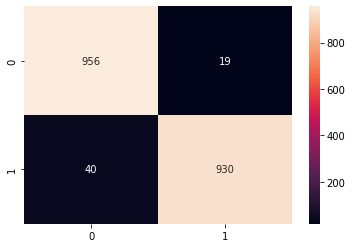

In [872]:
rf_class = RandomForestClassifier()
rf_class.fit(X_train,y_train)
y_pred = rf_class.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Random Forest Classifier Testing-set accuracy is {acc}')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

## Gradient Boost Classifier

Gradient Boost Classifier Testing-set accuracy is 0.9444730077120823


<AxesSubplot:>

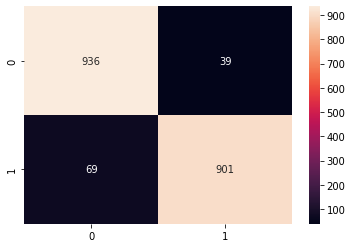

In [873]:
gb_class = GradientBoostingClassifier()
gb_class.fit(X_train,y_train)
y_pred =  gb_class.predict(X_test)
acc = accuracy_score(y_test, y_pred )
print(f'Gradient Boost Classifier Testing-set accuracy is {acc}')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt = 'd')

## KNN

Knn esting-set accuracy is 0.9439588688946016


<AxesSubplot:>

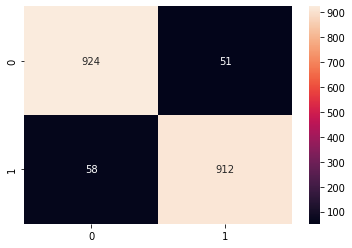

In [874]:
knn_class = KNeighborsClassifier(n_neighbors=10)
knn_class.fit(X_train, y_train)
y_pred = knn_class.predict(X_test)
acc = accuracy_score(y_test , y_pred)
print(f'Knn esting-set accuracy is {acc}')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt ='d')

## Logistic Regression

Logistic Regression accuracy is 0.919280205655527


<AxesSubplot:>

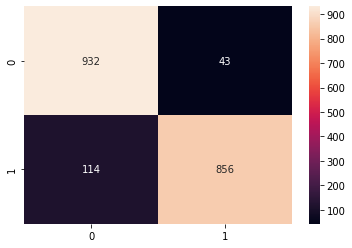

In [875]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f'Logistic Regression accuracy is {acc}')
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot = True, fmt ='d')

SVC accuracy is 0.9367609254498714


<AxesSubplot:>

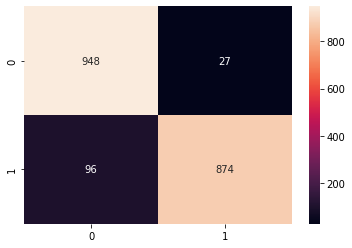

In [876]:
svc_class = SVC()
svc_class.fit(X_train,y_train)
pred = svc_class.predict(X_test)
acc = accuracy_score(y_test,pred)
print(f'SVC accuracy is {acc}')
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm,annot = True, fmt='d')

## MLP classifier

MLP Accuracy is 0.9526992287917738


/home/pedro/Desktop/ML/.env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



<AxesSubplot:>

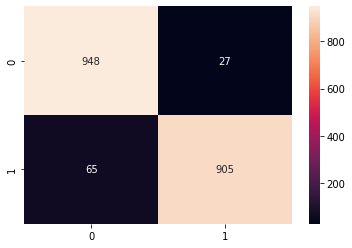

In [877]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
pred = mlp.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f'MLP Accuracy is {acc}')
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot= True, fmt= 'd')

### Chossing the 3 best models

Votting classifier Accuracy is 0.9629820051413882


<AxesSubplot:>

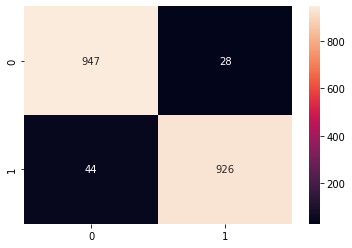

In [878]:
# random forest Gradient boost Knn

clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()
vote_class = VotingClassifier(estimators = [('gb1',clf1), ('rf1',clf2),('kn1',clf3)], voting = 'soft')
vote_class.fit(X_train,y_train)
predictions = vote_class.predict(X_test)

print(f'Votting classifier Accuracy is {accuracy_score(y_test, predictions)}')
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot= True, fmt='d')